In [15]:
import neuromaps
import numpy as np
from surfplot import Plot
import nibabel as nib
import json
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
from neuromaps.datasets import fetch_fslr
from neuromaps.transforms import fsaverage_to_fslr
from neuromaps.datasets import fetch_fsaverage
import os

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_48827/671657945.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


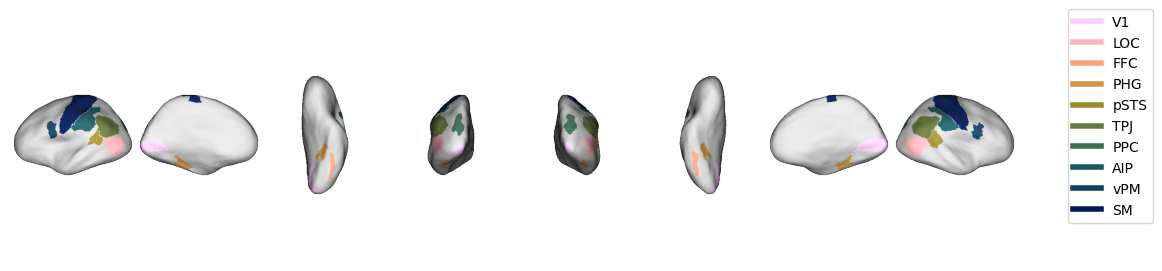

: 

In [41]:


# Fetch fsaverage surfaces
surfaces = fetch_fsaverage()
lh, rh = surfaces['inflated']

# Load FreeSurfer annotation files
lh_labels, lh_ctab, lh_names = nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/lh.HCP_MMP1.fsaverage6.annot')
rh_labels, rh_ctab, rh_names = nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/rh.HCP_MMP1.fsaverage6.annot')

# Define ROIs
rois = {
    "V1": [1],
    "LOC": [140, 141, 157, 156, 159, 2, 23],
    "FFC": [18],
    "PHG": [126, 155, 127],
    "pSTS": [28, 139],
    "TPJ": [149, 150, 151],
    "PPC": [13, 19, 16, 17],
    "AIP": [117, 116, 148, 147],
    "vPM": [78, 80],
    "SM": [8, 9, 51, 52, 53]
}


# Function to plot all ROIs
def plot_all_rois(rois, lh_labels, rh_labels, surfaces):
    lh, rh = surfaces


    p = Plot(surf_lh=lh, surf_rh=rh, size=(1200, 300), zoom=1.2, layout='row',
             views=['lateral', 'medial', 'ventral', 'posterior'], 
             brightness=.7,
             mirror_views=True)
    # colors = plt.cm.Spectral(np.linspace(0, 1, len(rois)))  # Use tab20 colormap for distinct colors
    colors = cmc.batlow_r(np.linspace(0, 1, len(rois)))
    for idx, (roi_name, roi_indices) in enumerate(rois.items()):
        color = colors[idx]
        lh_roi_map = np.full(lh_labels.shape, np.nan)
        rh_roi_map = np.full(rh_labels.shape, np.nan)
        
        lh_roi_map[np.in1d(lh_labels, roi_indices)] = idx + 1
        rh_roi_map[np.in1d(rh_labels, roi_indices)] = idx + 1
        
        p.add_layer({'left': lh_roi_map, 'right': rh_roi_map}, cmap=plt.cm.colors.ListedColormap([color]),
                    cbar=False)
    
    fig = p.build()
    fig.show()
    
    # Add legend
    handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
    labels = list(rois.keys())
    plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.show()
    save_dir = f'/Users/h/Documents/projects_local/life-encoding/figure/roi'
    save_dir = f'/Users/h/jung2heejung@gmail.com - Google Drive/My Drive/life_encoding/figure/roi'

    fig.savefig(os.path.join(save_dir, f"roi_parcels.png"), dpi=300)

# Call the function to plot all ROIs
plot_all_rois(rois, lh_labels, rh_labels, (lh, rh))




In [31]:
lh_labels_fsaverage.shape

(40962,)

In [39]:
import numpy as np
import nibabel as nib

from neuromaps.datasets import fetch_fsaverage, fetch_fslr
from neuromaps.transforms import fsaverage_to_fslr
import os

import matplotlib.pyplot as plt

# Fetch fsaverage surfaces
fsaverage_surfaces = fetch_fsaverage()
gii_lh_fsaverage = fsaverage_surfaces['pial'][0]
gii_rh_fsaverage = fsaverage_surfaces['pial'][1]

# Fetch fsLR surfaces
fslr_surfaces = fetch_fslr()
lh_fslr, rh_fslr = fslr_surfaces['inflated']

# Load FreeSurfer annotation files
lh_labels, lh_ctab, lh_names = nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/lh.HCP_MMP1.fsaverage6.annot')
rh_labels, rh_ctab, rh_names = nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/life-encoding/scripts/HCP-MMP/rh.HCP_MMP1.fsaverage6.annot')

# Define ROIs
rois = {
    "V1": [1],
    "LOC": [140, 141, 157, 156, 159, 2, 23],
    "FFC": [18],
    "PHG": [126, 155, 127],
    "pSTS": [28, 139],
    "TPJ": [149, 150, 151],
    "PPC": [13, 19, 16, 17],
    "AIP": [117, 116, 148, 147],
    "vPM": [78, 80],
    "SM": [8, 9, 51, 52, 53]
}

# Function to plot all ROIs
def plot_all_rois_fslr(rois, lh_labels, rh_labels, lh_fslr, rh_fslr):
    # Initialize fsaverage maps
    lh_roi_map_fsaverage = np.zeros_like(lh_labels, dtype=np.float32)
    rh_roi_map_fsaverage = np.zeros_like(rh_labels, dtype=np.float32)
    
    # Map ROI indices to fsaverage space
    for idx, roi_indices in enumerate(rois.values(), start=1):
        lh_roi_map_fsaverage[np.in1d(lh_labels, roi_indices)] = idx
        rh_roi_map_fsaverage[np.in1d(rh_labels, roi_indices)] = idx
    
    # Transform to fsLR space
    lh_roi_map_fslr = fsaverage_to_fslr(lh_roi_map_fsaverage, target_density='32k', hemi='L', method='nearest')
    rh_roi_map_fslr = fsaverage_to_fslr(rh_roi_map_fsaverage, target_density='32k', hemi='R', method='nearest')
    
    # Initialize the plot
    p = Plot(surf_lh=lh_fslr, surf_rh=rh_fslr, size=(1200, 300), zoom=1.2, layout='row',
             views=['lateral', 'medial', 'ventral', 'posterior'], brightness=0.7, mirror_views=True)
    
    # Colormap for ROIs
    colors = cmc.batlow_r(np.linspace(0, 1, len(rois)))
    
    for idx, color in enumerate(colors, start=1):
        lh_layer = np.where(lh_roi_map_fslr == idx, idx, np.nan)
        rh_layer = np.where(rh_roi_map_fslr == idx, idx, np.nan)
        p.add_layer({'left': lh_layer, 'right': rh_layer}, cmap=plt.cm.colors.ListedColormap([color]), cbar=False)
    
    # Build and show plot
    fig = p.build()
    fig.show()
    
    # Add legend
    handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
    labels = list(rois.keys())
    plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    plt.show()

    # Save the plot
    save_dir = '/Users/h/Documents/projects_local/life-encoding/figure/roi'
    os.makedirs(save_dir, exist_ok=True)
    fig.savefig(os.path.join(save_dir, "roi_parcels_fslr.png"), dpi=300)

# Call the function to plot ROIs in fsLR space
plot_all_rois_fslr(rois, lh_labels, rh_labels, lh_fslr, rh_fslr)


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/neuromaps/transforms.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if img in DENSITY_MAP.values():


TypeError: len() of unsized object